<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-5/blob/main/Entrega1_Reto_Equipo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: TC4029.10 Ciencia y analitica de datos**
###Tecnológico de Monterrey

**Profr. Dra. María de la Paz Rico Fernández**

###**Entrega 1 (16/11) -> Limpieza, análisis, visualización y kmeans**

**EQUIPO 5:**

* **Laura Irán González Ojeda**
 *	Matrícula: A01794099

* **Marcela Alejandra Rosales Jiménez**
 *	 Matrícula: A01032022

Fecha de entrega: 16 de Noviembre de 2022


In [1]:
#Importación de Librerías
import requests, zipfile
from io import BytesIO
import pandas as pd
import numpy as np
import random

In [2]:
#Descarga de la Base de datos de calidad de agua
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
filename = url.split('/')
req = requests.get(url)
zipfile= zipfile.ZipFile(BytesIO(req.content))

In [3]:
#Extracción del conjunto de datos
zipfile.extractall('/content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo')

In [4]:
df_subterraneas = pd.read_csv("/content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv",  encoding="cp1252")
df_subterraneas

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [5]:
print("Aguas subterraneas:", df_subterraneas.isna().sum())

Aguas subterraneas: CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG             

##**Limpieza de datos**

Eliminamos la columna SDT_mg/L ya que todos sus valores con NaN.

In [6]:
df_subterraneas.drop(columns=["SDT_mg/L"], inplace=True)

Eliminamos la columna CLAVEA ya que puede interferir en el análisis y tiene un valor distinto para cada renglón.

In [7]:
df_subterraneas["CLAVE"].value_counts()

DLAGU6         1
OCGCE3209      1
OCFSU2993      1
OCFSU2994      1
OCFSU3048      1
              ..
DLHID6458      1
DLHID6461      1
DLHID6463      1
DLHID6467      1
OCRBR5109M1    1
Name: CLAVE, Length: 1068, dtype: int64

In [8]:
df_subterraneas.drop(columns=["CLAVE"], inplace=True)

In [9]:
df_subterraneas.shape

(1068, 55)

In [10]:
df_subterraneas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SITIO                 1068 non-null   object 
 1   ORGANISMO_DE_CUENCA   1068 non-null   object 
 2   ESTADO                1068 non-null   object 
 3   MUNICIPIO             1068 non-null   object 
 4   ACUIFERO              1068 non-null   object 
 5   SUBTIPO               1068 non-null   object 
 6   LONGITUD              1068 non-null   float64
 7   LATITUD               1068 non-null   float64
 8   PERIODO               1068 non-null   int64  
 9   ALC_mg/L              1064 non-null   float64
 10  CALIDAD_ALC           1064 non-null   object 
 11  CONDUCT_mS/cm         1062 non-null   float64
 12  CALIDAD_CONDUC        1062 non-null   object 
 13  SDT_M_mg/L            1066 non-null   object 
 14  CALIDAD_SDT_ra        1066 non-null   object 
 15  CALIDAD_SDT_salin    

###**Normalización del conjunto de datos**

A continuación, se realizará un proceso de limpieza de datos enfocado a eliminar los valores nulos detectados en algunas columnas; así como la normalización de los datos que contengan valores atípicos para evitar la pérdida de información.

In [11]:
tmp = df_subterraneas.isna().sum().to_frame()
tmp[tmp[0]>0]

,0
ALC_mg/L,4
CALIDAD_ALC,4
CONDUCT_mS/cm,6
CALIDAD_CONDUC,6
SDT_M_mg/L,2
CALIDAD_SDT_ra,2
CALIDAD_SDT_salin,2
DUR_mg/L,1
CALIDAD_DUR,1
N_NO3_mg/L,1


Rellenamos los registros vacíos de las columnas: 
- ALC_mg/L con el promedio
- CALIDAD_ALC con la moda

In [12]:
# Funcion para rellenar valores NaN con numeros aleatorios

def fill_random(column_val):
    if np.isnan(column_val) == True: 
        column_val = random.uniform(start, stop)
    else:
         column_val = column_val
    return column_val

In [13]:
promedio_alc_mgl = df_subterraneas["ALC_mg/L"].mean()
df_subterraneas['ALC_mg/L'] = df_subterraneas['ALC_mg/L'].fillna(promedio_alc_mgl)

In [14]:
mode_calidad_alc = df_subterraneas["CALIDAD_ALC"].mode()[0]
df_subterraneas['CALIDAD_ALC'] = df_subterraneas['CALIDAD_ALC'].replace(np.nan, mode_calidad_alc)

In [15]:
fill_var = df_subterraneas["CONDUCT_mS/cm"].mean()
df_subterraneas['CONDUCT_mS/cm'] = df_subterraneas['CONDUCT_mS/cm'].fillna(fill_var)

In [16]:
fill_var = df_subterraneas["CALIDAD_CONDUC"].mode()[0]
df_subterraneas['CALIDAD_CONDUC'] = df_subterraneas['CALIDAD_CONDUC'].replace(np.nan, fill_var)

In [17]:
df_subterraneas["SDT_M_mg/L"] = df_subterraneas["SDT_M_mg/L"].replace("<25", np.nan)
df_subterraneas["SDT_M_mg/L"] = df_subterraneas["SDT_M_mg/L"].astype(float)
fill_var = df_subterraneas["SDT_M_mg/L"].mean()
df_subterraneas['SDT_M_mg/L'] = df_subterraneas['SDT_M_mg/L'].replace(np.nan, fill_var)

In [18]:
fill_var = df_subterraneas["CALIDAD_SDT_ra"].mode()[0]
df_subterraneas['CALIDAD_SDT_ra'] = df_subterraneas['CALIDAD_SDT_ra'].replace(np.nan, fill_var)

In [19]:
fill_var = df_subterraneas["CALIDAD_SDT_salin"].mode()[0]
df_subterraneas['CALIDAD_SDT_salin'] = df_subterraneas['CALIDAD_SDT_salin'].replace(np.nan, fill_var)

In [20]:
fill_var = df_subterraneas["CALIDAD_DUR"].mode()[0]
df_subterraneas['CALIDAD_DUR'] = df_subterraneas['CALIDAD_DUR'].replace(np.nan, fill_var)

In [21]:
fill_var = df_subterraneas["CALIDAD_N_NO3"].mode()[0]
df_subterraneas['CALIDAD_N_NO3'] = df_subterraneas['CALIDAD_N_NO3'].replace(np.nan, fill_var)

In [22]:
df_subterraneas['CONTAMINANTES'] = df_subterraneas['CONTAMINANTES'].replace(np.nan, "Desconocido")

In [23]:
# DUR_mg/L contiene un renglón con valor NaN y 26 valores string.
# Vamos a ponerle a esos 27 valores el promedio de esa columna de los valores <20.
df_subterraneas["DUR_mg/L"] = df_subterraneas["DUR_mg/L"].replace("<20", np.nan)
df_subterraneas["DUR_mg/L"] = df_subterraneas["DUR_mg/L"].astype(float)
start = 0
stop = 19
df_subterraneas['DUR_mg/L'] = df_subterraneas['DUR_mg/L'].apply(fill_random)

In [24]:
# Se procederá a relizar el mismo proceso anterior para normalizar los datos con <0.20
df_subterraneas["N_NO3_mg/L"] = df_subterraneas["N_NO3_mg/L"].replace("<0.02", np.nan)
df_subterraneas["N_NO3_mg/L"] = df_subterraneas["N_NO3_mg/L"].astype(float)
start = 0.0
stop = 0.019
df_subterraneas['N_NO3_mg/L'] = df_subterraneas['N_NO3_mg/L'].apply(fill_random)

In [25]:
#Eliminamos los caracteres especiales '<' de las columnas numericas para evitar la pérdida de información
columns = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL', 'N_NO3_mg/L','AS_TOT_mg/L',
          'CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'] 

df_subterraneas[columns] = df_subterraneas[columns].replace({'<':''}, regex=True)


In [26]:
tmp = df_subterraneas.isna().sum().to_frame()
tmp[tmp[0]>0]

,0


In [36]:
#Identificación de columnas Numéricas y Categóricas
col_numericas = [
    "ALC_mg/L",
    "SDT_M_mg/L",
    'FLUORUROS_mg/L',
    'DUR_mg/L',  
    'COLI_FEC_NMP/100_mL',
    'N_NO3_mg/L',
    'AS_TOT_mg/L',
    'CD_TOT_mg/L',
    'CR_TOT_mg/L',
    'HG_TOT_mg/L',
    'PB_TOT_mg/L',
    'MN_TOT_mg/L',
    'FE_TOT_mg/L' 
]

col_string = [    
    'CONTAMINANTES'
]

col_categoricas = [
 'SUBTIPO',
 'CALIDAD_ALC',
 'CALIDAD_CONDUC',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CALIDAD_FLUO', 
 'CALIDAD_DUR',
 'CALIDAD_COLI_FEC',
 'CALIDAD_N_NO3',
 'CALIDAD_AS',
 'CALIDAD_CD',
 'CALIDAD_CR',
 'CALIDAD_HG',
 'CALIDAD_PB',
 'CALIDAD_MN',
 'CALIDAD_FE',
 'SEMAFORO',
 'CUMPLE_CON_ALC',
 'CUMPLE_CON_COND',
 'CUMPLE_CON_SDT_ra',
 'CUMPLE_CON_SDT_salin',
 'CUMPLE_CON_FLUO',
 'CUMPLE_CON_DUR',
 'CUMPLE_CON_CF',
 'CUMPLE_CON_NO3',
 'CUMPLE_CON_AS',
 'CUMPLE_CON_CD',
 'CUMPLE_CON_CR',
 'CUMPLE_CON_HG',
 'CUMPLE_CON_PB',
 'CUMPLE_CON_MN',
 'CUMPLE_CON_FE'
]

In [35]:
df_subterraneas['ALC_mg/L']

0       229.990
1       231.990
2       204.920
3       327.000
4       309.885
         ...   
1063    231.045
1064    256.000
1065    330.690
1066    193.140
1067    263.070
Name: ALC_mg/L, Length: 1068, dtype: float64

In [37]:
#Cambio del tipo de dato Object a Float en variables definidas como numéricas 
df_subterraneas[col_numericas]= df_subterraneas[col_numericas].astype('float')

#Cambio del tipo de dato Object a Category en variables definidas como categóricas 
#df_subterraneas[col_categoricas]

In [38]:
df_subterraneas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SITIO                 1068 non-null   object 
 1   ORGANISMO_DE_CUENCA   1068 non-null   object 
 2   ESTADO                1068 non-null   object 
 3   MUNICIPIO             1068 non-null   object 
 4   ACUIFERO              1068 non-null   object 
 5   SUBTIPO               1068 non-null   object 
 6   LONGITUD              1068 non-null   float64
 7   LATITUD               1068 non-null   float64
 8   PERIODO               1068 non-null   int64  
 9   ALC_mg/L              1068 non-null   float64
 10  CALIDAD_ALC           1068 non-null   object 
 11  CONDUCT_mS/cm         1068 non-null   float64
 12  CALIDAD_CONDUC        1068 non-null   object 
 13  SDT_M_mg/L            1068 non-null   float64
 14  CALIDAD_SDT_ra        1068 non-null   object 
 15  CALIDAD_SDT_salin    

##**Exploración de los datos**

describe(), mean(), plot, boxplot de pandas

###**Tendencias centrales promedio, media y mediana de los datos**

###**Tendencias centrales promedio, media y mediana de los datos**

###**Medidas de dispersión, máximo, mínimo**

###**Medidas de posición no centrales , los cuartiles , outliers**

###**Matriz de Correlación**

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

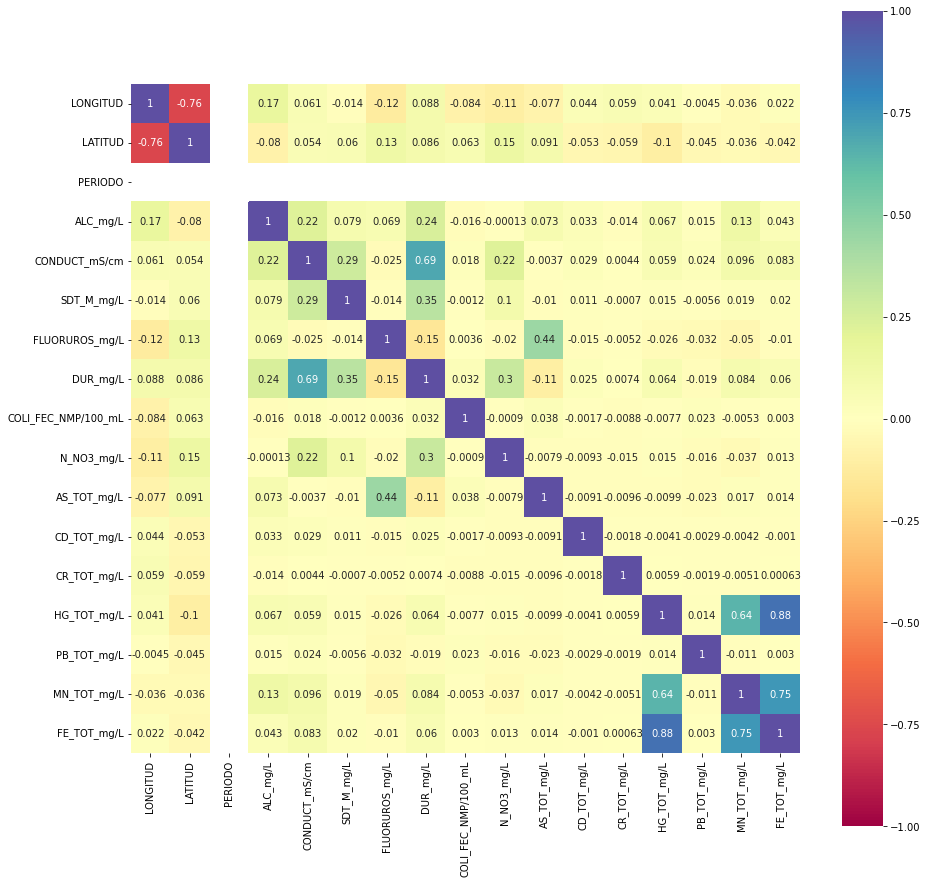

In [50]:
correlation_matrix  = df_subterraneas.corr(method='pearson')
f,ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlation_matrix,cmap='Spectral', annot=True, vmax = 1, vmin = -1, square = True,)

##**Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.**

##**Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.**